라이브러리 import

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

데이터 생성

In [4]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [5]:
X_train[0:10]

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01]])

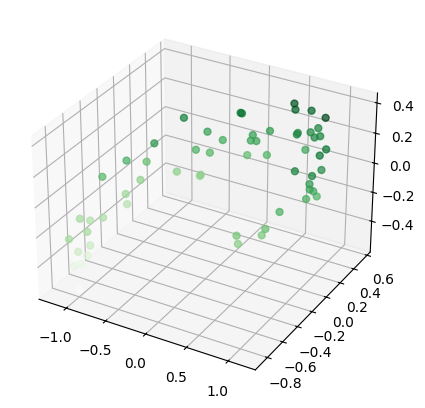

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# 데이터
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,2], s= 25, alpha=0.7, cmap=plt.cm.Greens)
plt.show()

모델 학습

In [7]:
np.random.seed(15)
tf.random.set_seed(15)
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3372
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3330
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3252
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3215
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3181
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3114
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.

차원 축소

In [8]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 2ms/step


원데이터, 차원축소 비교

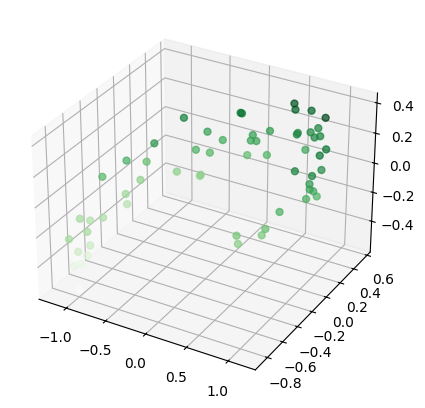

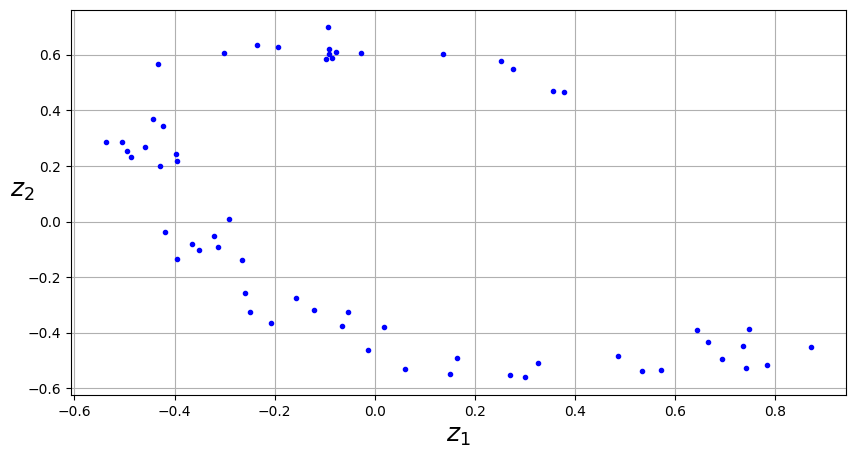

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 데이터
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,2], s= 25, alpha=0.7, cmap=plt.cm.Greens)
plt.show()

# 차원축소
fig = plt.figure(figsize=(10,5))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()